# Data Analist


> This is block for test

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly as py


### Importing csv file

In [2]:
data = pd.read_excel('multiPages.xlsx')

In [ ]:
# data.head()

## Feature Enginering

### Which year made the most top rated anime

This is for ALL data

In [ ]:
years = np.arange(197,203,1).tolist()

for year in years:
    patternY = str(year)

    yearMask = data['AirDate'].str.contains(patternY)
    anime_Year = (data[yearMask])

    print('Top animes in decade', patternY, '\b0 :' , len(anime_Year))

In [ ]:
infoMonth = []
# If not like this, its sorted alphabeticly[Apr-Sep]
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep','Oct', 'Nov', 'Dec']

for month in months:
    patternM = (month)
    monthMask = data['AirDate'].str.contains(patternM)
    anime_Month = (data[monthMask])

    print('Number animes in', patternM,' :' ,len(anime_Month))
    # print(strMonth)
    infoMonth.append(anime_Month)   ## To find the dataframe acc. to month index

# (list(multiPage.AirDate.groupby(multiPage.AirDate.dt.year)))


---
------
## Only TV shows

### Clean-up
<!-- > test -->

In [3]:
dataTV = data.loc[data.Type == 'TV'].copy()

In [ ]:
dataTV.columns

Formatting

In [4]:
# cols_org = ['Rank', 'Title', 'Rating', 'Type', 'AirDate', 'EndDate', 'TotalEpi',
#        'Members', 'MAL Ref', 'Status', 'Premiered', 'Broadcast', 'Studio',
#        'Duration', 'Age Ratingn', 'Genres', 'Producer', 'Source']



dataTV['AirDate_dt'] = pd.to_datetime(dataTV.AirDate, infer_datetime_format=True)
dataTV['EndDate_dt'] = pd.to_datetime(dataTV.EndDate, infer_datetime_format=True)


### ---Dropping unneeded coloms
dataTV = dataTV.drop(columns=['AirDate', 'EndDate'])

## Reorganizing coloms
dataTV = dataTV[['Rank', 'Title', 'Rating', 'Type', 'AirDate_dt', 'EndDate_dt', 'TotalEpi',
                'Members', 'MAL Ref', 'Status', 'Premiered', 'Broadcast', 'Studio',
                'Duration', 'Age Ratingn', 'Genres', 'Producer', 'Demograph', 'Themes',
                'Source']]



In [ ]:
# dataTV.info()

--------
------
### Released Stas

-----
#### Monthl released
AirDates

In [ ]:
# dataTV.AirDate_dt.astype('datetime64[ns]')
# dataTV.AirDate_dt.dt.month_name().value_counts().sort_index()

In [ ]:
monthCount = dataTV.AirDate_dt.dt.month.value_counts().sort_index()

j=0
for i in monthCount:
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep','Oct', 'Nov', 'Dec']
    print(f'Number anmies in {months[j]} : {i}')
    j=j+1


# monthCount.plot(kind='bar',
#                 xlabel='Months', 
#                 ylabel='Counts',
            
#                 title='Months the top 500 animes were released',
#                 color = 'blue',
#                 # rot=90 ##Rotate x value names,
#                 figsize=(15,5)
#                   )

# dataTV.AirDate_dt.dt.year.value_counts().sort_index()

In [ ]:
plt.figure(figsize=(10,5))

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep','Oct', 'Nov', 'Dec']

ax = sns.barplot(x = months,
                 y = monthCount)

ax.set_title('Months the top 500 animes were released')

for container in ax.containers:
    ax.bar_label(container)


In [ ]:
dataTV['Aired_months'] = dataTV.AirDate_dt.dt.month

In [ ]:
dataTV.groupby('Aired_months')['Aired_months'].count().plot.bar(figsize = (15,5))

##### Can Delete This

In [ ]:
# months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep','Oct', 'Nov', 'Dec']

# monthsCounts = dataTV.AirDate.str.split(' ').str[0].value_counts()

# for i in months:
#     print(f'Number anmies in {i} : {monthsCounts[i]}')


# #--------------------

# monthsCounts[months].plot(kind='bar',
#                           xlabel='Months', 
#                           ylabel='Counts',
#                           title='Months the top 500 animes were released',
#                           color = 'blue',
#                         # rot=90 ##Rotate x value names,
#                         figsize=(15,5)
#                           )


As we can see from the graph and and printed data, most top animes was released in year quaters.

----
####  Seasonly released

Premiered

In [ ]:
dataTV['Premiered_Season'] =dataTV.Premiered.str.split(' ').str[0]

In [ ]:
seasonGroup = dataTV.groupby('Premiered_Season')
season_count = seasonGroup['Premiered_Season'].count()

season_count = season_count.reindex(['Spring', 'Summer', 'Fall', 'Winter'])

ax = season_count.plot.bar()
ax.set_title('Seasonly Releases')

for container in ax.containers:
    ax.bar_label(container)

##### Other Season Count graph


In [ ]:
# ### USE THIS WAY FROM NOW

# seasonsNew = dataTV.Premiered.str.split(' ').str[0].value_counts()

# print('Number animes in Fall:   ', seasonsNew[0])
# print('Number animes in Spring: ', seasonsNew[1])
# print('Number animes in Winter: ', seasonsNew[2])
# print('Number animes in Summer: ', seasonsNew[3])


# plt.barh(['Spring', 'Summer', 'Fall', 'Winter'], seasonsNew)
# plt.title('Amount of top animes for each Season')
# plt.ylabel('Total top animes released')

In [ ]:
grouped = dataTV.groupby(['Premiered_Season', 'Broadcast'])

# grouped.count()

----
#### Yearly released for decade

Decades devide for each release

<!-- <br> - decades_data = dataTV.groupby((dataTV.AirDate_dt.dt.year//10)*10) -->


In [ ]:
decade = (dataTV.groupby(dataTV.AirDate_dt.dt.year//10)).count()
decade.index.name ='decades'

decade = decade.reset_index().assign(decades=decade.index*10).rename(columns={'AirDate_dt':'counts'})
decade = decade.rename(columns={'AirDate_dt':'Counts'})

# decade

ax =  decade.plot.bar(x='decades', 
                      y='counts',
                      grid = False
                    )
ax.set_ylabel('Counts')
ax.set_title('Top TV released per decade')

In [ ]:
# decade

-------
*******
### Ratings Stats

##### Seasonal Rating

In [ ]:
seasonal_rating = dataTV.groupby('Premiered_Season')['Rating']

seasonal_rating_avr = seasonal_rating.mean().round(2)

ax = seasonal_rating_avr.plot.barh()
ax.set_title('Average ratings per Season')
ax.set_ylabel(None)
ax.set_xlabel('Rating avr')

ax.set_xlim(7.5 , 9)

##### Monthly Ratings

In [ ]:
month_rating = dataTV.groupby('Aired_months')['Rating']
month_rating_mean = month_rating.mean()


# Creating and modifing plot
ax = month_rating_mean.plot.bar()
ax.set_xlabel(months)
ax.set_ylim(7,9)


# month_rating_mean = month_rating_mean.reset_index()


In [ ]:
plt.figure(figsize=(10,8))

month_rating_mean.index = months

ax = sns.barplot(x=month_rating_mean.index,
                y=month_rating_mean)

# ax.set_xlabel(months)    
ax.set_ylim(7.5,9)


In [ ]:
# month_rating_mean.Aired_months

# month_rating_mean

In [ ]:
month_rating.get_group(2)

#### Yearly ratings

In [ ]:
decades_data = dataTV.groupby((dataTV.AirDate_dt.dt.year//10)*10)

ax = decades_data['Rating'].mean().plot.barh()
ax.set_xlim(7,10)


In [ ]:
# dataTV.groupby(da)

In [ ]:
decade

-------
*******
### Broadcasts Stats

In [ ]:
newDay = (dataTV.Broadcast[:5]).str[:-1]

# pd.to_datetime(newDay, infer_datetime_format=True)

newDay

In [ ]:
broadcast_group = dataTV.groupby(dataTV.Broadcast)

#### Wekkly released counts

In [ ]:
## Airing Days

dataTV.Broadcast.value_counts()

In [ ]:
## Each weekday count
broadcast_count = broadcast_group['Broadcast'].count()

#Drop elements
broadcast_count = broadcast_count.drop(['Not scheduled once per week\n', 'Unknown\n'])

# Reorder elements
broadcast_count = broadcast_count.reindex(['Mondays', 'Tuesdays', 'Wednesdays', 'Thursdays', 'Fridays', 'Saturdays', 'Sundays'])

In [ ]:
# ax = broadcast_count.plot.bar()

# ax.set_title('Weekly releases')
# ax.set_ylabel('Counts')

# pingi = sns.load_dataset('penguins')
# ax = sns.barplot(data=pingi, x = 'island', y='body_mass_g', hue='sex')

In [ ]:
plt.figure(figsize=(10,5))

ax = sns.barplot(x = broadcast_count.index,
                 y = broadcast_count.values
                 )

ax.set(title='Weekly Broadcast count',
    )


for container in ax.containers:
    ax.bar_label(container)

In [ ]:
date_order = ['Mondays', 'Tuesdays', 'Wednesdays', 'Thursdays', 'Fridays', 'Saturdays', 'Sundays']

ax = sns.catplot(data = dataTV,
                 x= 'Broadcast',
                 kind = 'count',
                 order= date_order,                
            )

ax.tick_params(axis='x',
              rotation = 45)

# for container in ax.containers:
#     ax.bar_label(container)

#### Seasonly

In [ ]:
# %config InlineBackend.figure_format = 'retina'

# broadcast_group['Premiered_Season'].describe()
# broadcast_group['Premiered_Season'].value_counts().plot.bar(figsize = (15,5))
ax = (broadcast_group['Premiered_Season'].value_counts()
                                    .unstack()
                                    .reindex(date_order)
                                    .plot.bar(figsize = (15,8), fontsize=13)
                                    )

ax.set_title('Broadcast day Seasonly counts', fontsize=15 )
ax.set_xlabel('Broadcast Day', fontsize = 15)
ax.set_ylabel('Count',fontsize=15)
       
ax.tick_params(rotation=0)

for container in ax.containers:
    ax.bar_label(container)

In [ ]:
# sns.catplot(data = dataTV,
#             x = 'Premiered_Season',
#             col = 'Premiered_Season',
#             y='Broadcast',
#             kind = 'count')


# sns.catplot( x = season_count,
#             y = broadcast_count
#             )

-----
-----
### Studios Stats

In [5]:
# studi_count = dataTV.Studio.value_counts()

studio_group = dataTV.groupby('Studio')#.value_counts().plot.bar(figsize = (15,5))


In [88]:
studio_names = studio_group.first().index

# ['8bit', 'A-1 Pictures', 'A.C.G.T.', 'Ajia-do', 'Artland',
    # 'Bandai Namco Pictures', 'Bibury Animation Studios', 'Bones',
    # 'Brain's Base', 'C-Station', 'CloverWorks', 'David Production',
    # 'Gainax', 'Gallop', 'Geno Studio', 'Gonzo', 'Hal Film Maker', 'Imagin',
    # 'J.C.Staff', 'Kinema Citrus', 'Kyoto Animation', 'Lerche', 'MAPPA',
    # 'Madhouse', 'Manglobe', 'Mushi Production', 'Nexus', 'Nippon Animation',
    # 'OLM', 'Orange', 'P.A. Works', 'Pastel', 'Pierrot', 'Platinum Vision',
    # 'Production I.G', 'SILVER LINK.', 'Satelight', 'Science SARU', 'Shaft',
    # 'Shin-Ei Animation', 'Shuka', 'Studio Bind', 'Studio Deen',
    # 'Studio Hibari', 'Sunrise', 'SynergySP', 'TMS Entertainment', 'TROYCA',
    # 'Tatsunoko Production', 'Telecom Animation Film', 'Telescreen',
    # 'Tezuka Productions', 'Toei Animation', 'Tokyo Movie Shinsha',
    # 'Triangle Staff', 'White Fox', 'Wit Studio', 'Zero-G', 'feel.',
    # 'ufotable']

len(studio_names)       ## There are 60 Studios

60

In [91]:
studio_count = studio_group['Studio'].count()
len(studio_count.values)

60

Text(0.5, 1.0, 'Studio anime release count')

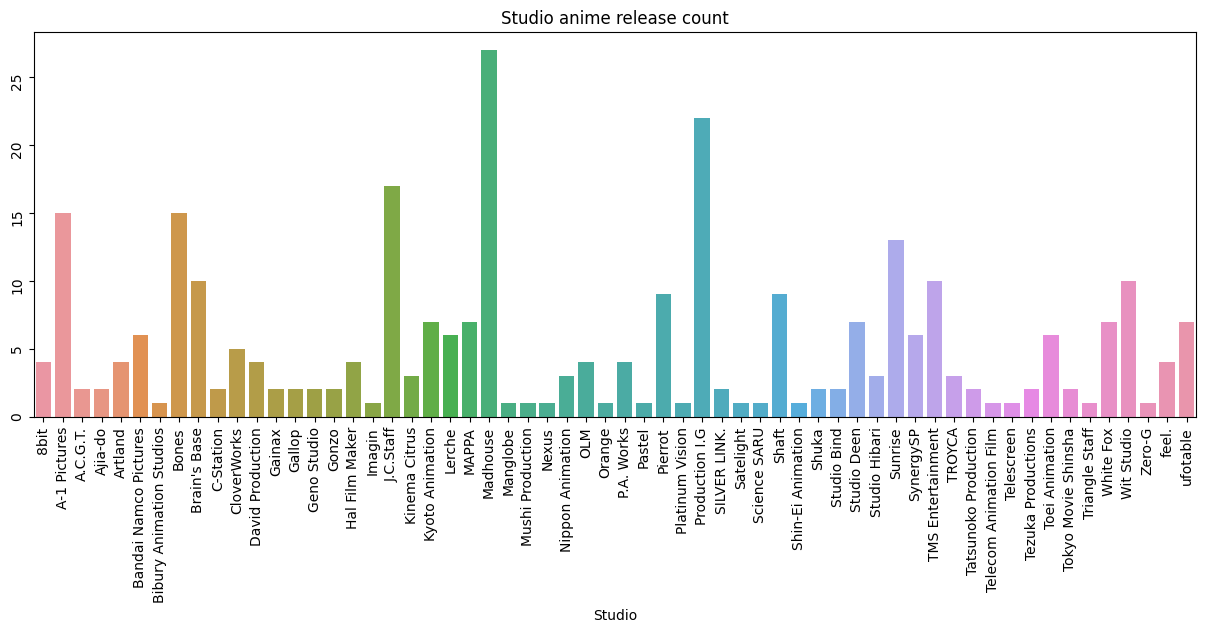

In [90]:
plt.figure(figsize=(15,5))

ax = sns.barplot(x = studio_count.index,
                 y = studio_count.values)

ax.tick_params(rotation = 90)
ax.set_title('Studio anime release count')


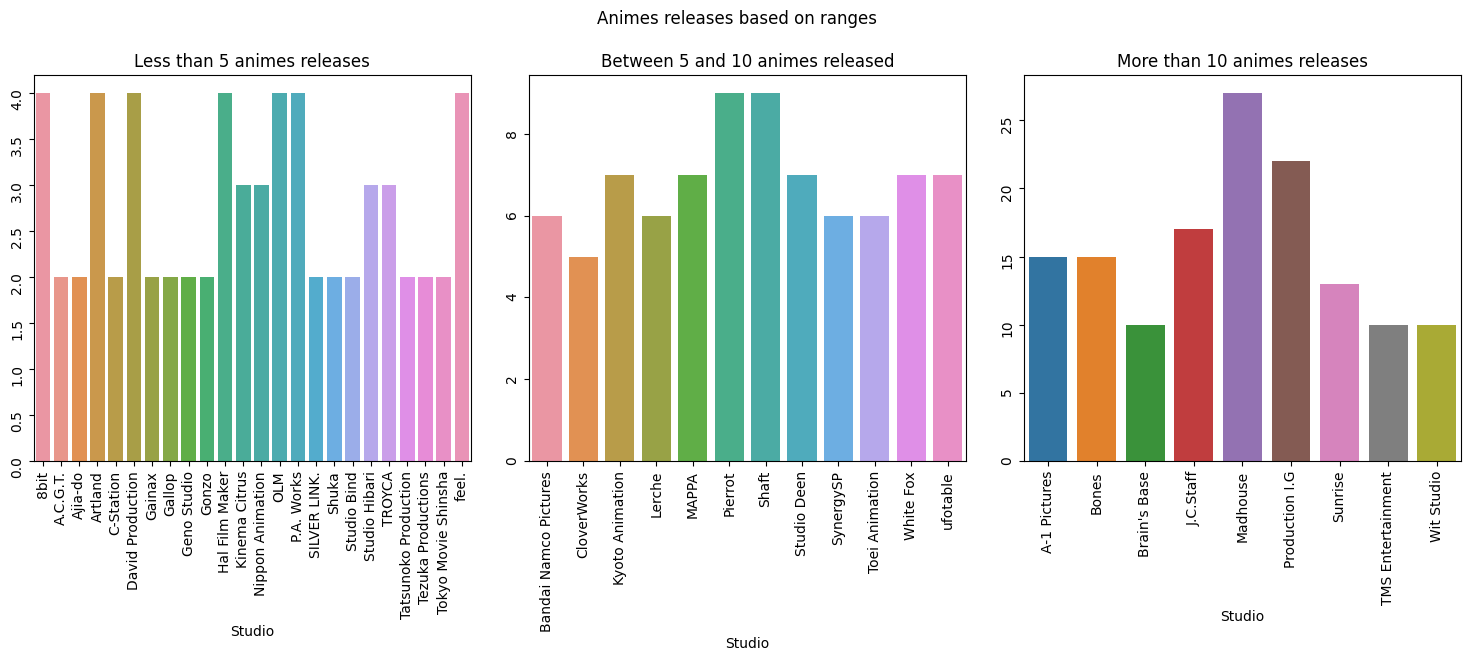

In [92]:
less_five = (studio_count.where((studio_count.values > 1) & (studio_count.values < 5))).dropna()
less_ten = (studio_count.where((studio_count.values > 4) & (studio_count.values < 10))).dropna()
more_ten = (studio_count.where(studio_count.values > 9)).dropna()


fig,ax = plt.subplots(1,3, figsize = (15,5))
fig.suptitle('Animes releases based on ranges')
fig.tight_layout(h_pad=15)
fig.subplots_adjust(top = .85)      # Header Size



sns.barplot(ax = ax[0],
            x = less_five.index,
            y = less_five.values
            )

sns.barplot(ax = ax[1],
            x = less_ten.index,
            y = less_ten.values
            )

sns.barplot(ax= ax[2],
            x = more_ten.index, 
            y = more_ten.values)


ax[0].set_title('Less than 5 animes releases')
ax[1].set_title('Between 5 and 10 animes released')
ax[2].set_title('More than 10 animes releases')


ax[0].tick_params(rotation = 90)
ax[1].tick_params(rotation = 90)
ax[2].tick_params(rotation = 90)

# less_ten.plot.bar()
# more_ten.plot.bar()

-----
----
### Age rating releases

#### Age Ratings

Text(0.5, 1.0, 'Age Rating Counts')

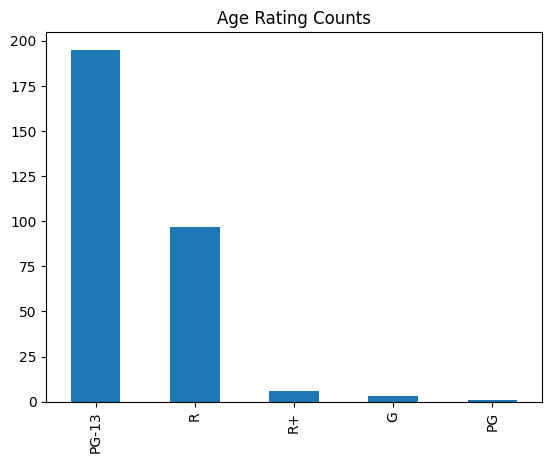

In [50]:
dataTV['Age Ratingn'].value_counts().plot.bar()

plt.title('Age Rating Counts')
# plt.grid()

In [97]:
dataTV['Age Ratingn'].value_counts()

PG-13    195
R         97
R+         6
G          3
PG         1
Name: Age Ratingn, dtype: int64

In [100]:
age_group = dataTV.groupby('Age Ratingn')['Age Ratingn']
age_count = age_group.count()

age_count

Age Ratingn
G          3
PG         1
PG-13    195
R         97
R+         6
Name: Age Ratingn, dtype: int64

#### Studio Rating Releases

In [85]:
studio_group['Age Ratingn'].value_counts().unstack()#.plot.bar(figsize = (15,5))
strudio_age = studio_group['Age Ratingn'].value_counts()
# strudio_age = studio_group['Age Ratingn']


Text(0.5, 1.0, 'Amount of studio ageRatings Releases')

<Figure size 1500x500 with 0 Axes>

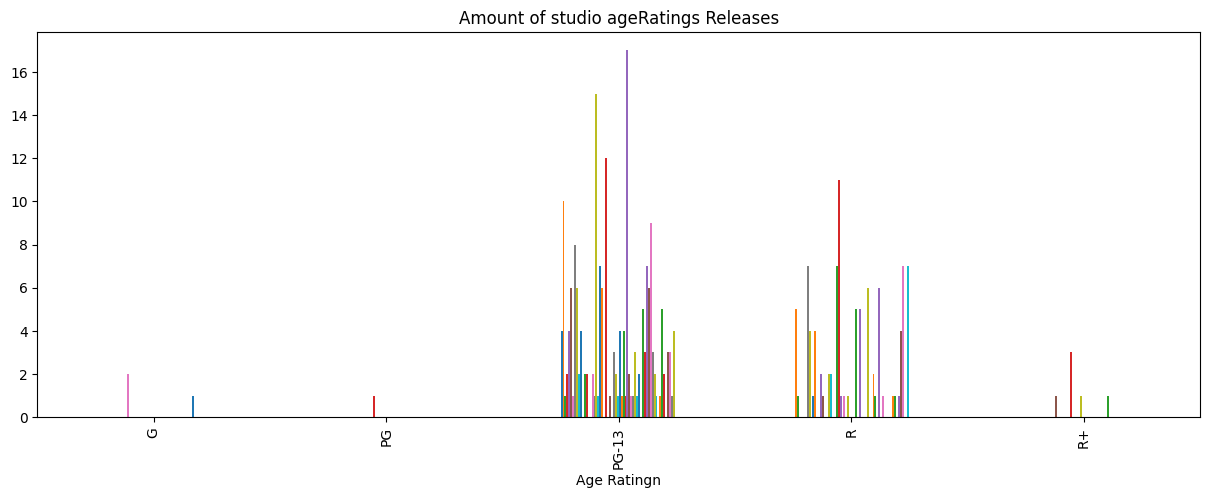

In [98]:
plt.figure(figsize=(15,5))

# strudio_age.unstack().plot.bar(figsize=(15,5))
(strudio_age.unstack(level=0)
            .plot.bar(legend=False, figsize = (15,5)) 
            )
plt.title('Amount of studio ageRatings Releases')


In [ ]:
## Zoomed in graph of above

pg13_studios = strudio_age.unstack(level=1)['PG-13'].dropna()

# pg13_studios.plot.bar(figsize = (15,5))
plt.figure(figsize=(15,5))

ax = sns.barplot(x = pg13_studios.index,
                 y = pg13_studios.values)

ax.set_title('PG 13 Ratings')
ax.tick_params(rotation = 90)

In [9]:
g_studios = (strudio_age.unstack(level=1)['G'].dropna()).astype(int)
pg_studios = (strudio_age.unstack(level=1)['PG'].dropna()).astype(int)
pg13_studios = (strudio_age.unstack(level=1)['PG-13'].dropna()).astype(int)
r_studios = (strudio_age.unstack(level=1)['R'].dropna()).astype(int)
rPlus_studios = (strudio_age.unstack(level=1)['R+'].dropna()).astype(int)

In [80]:
len(pg13_studios)        ## Means total of 50 Studios have PG13 Releases

50

Text(0.5, 1.0, 'R+ Rating')

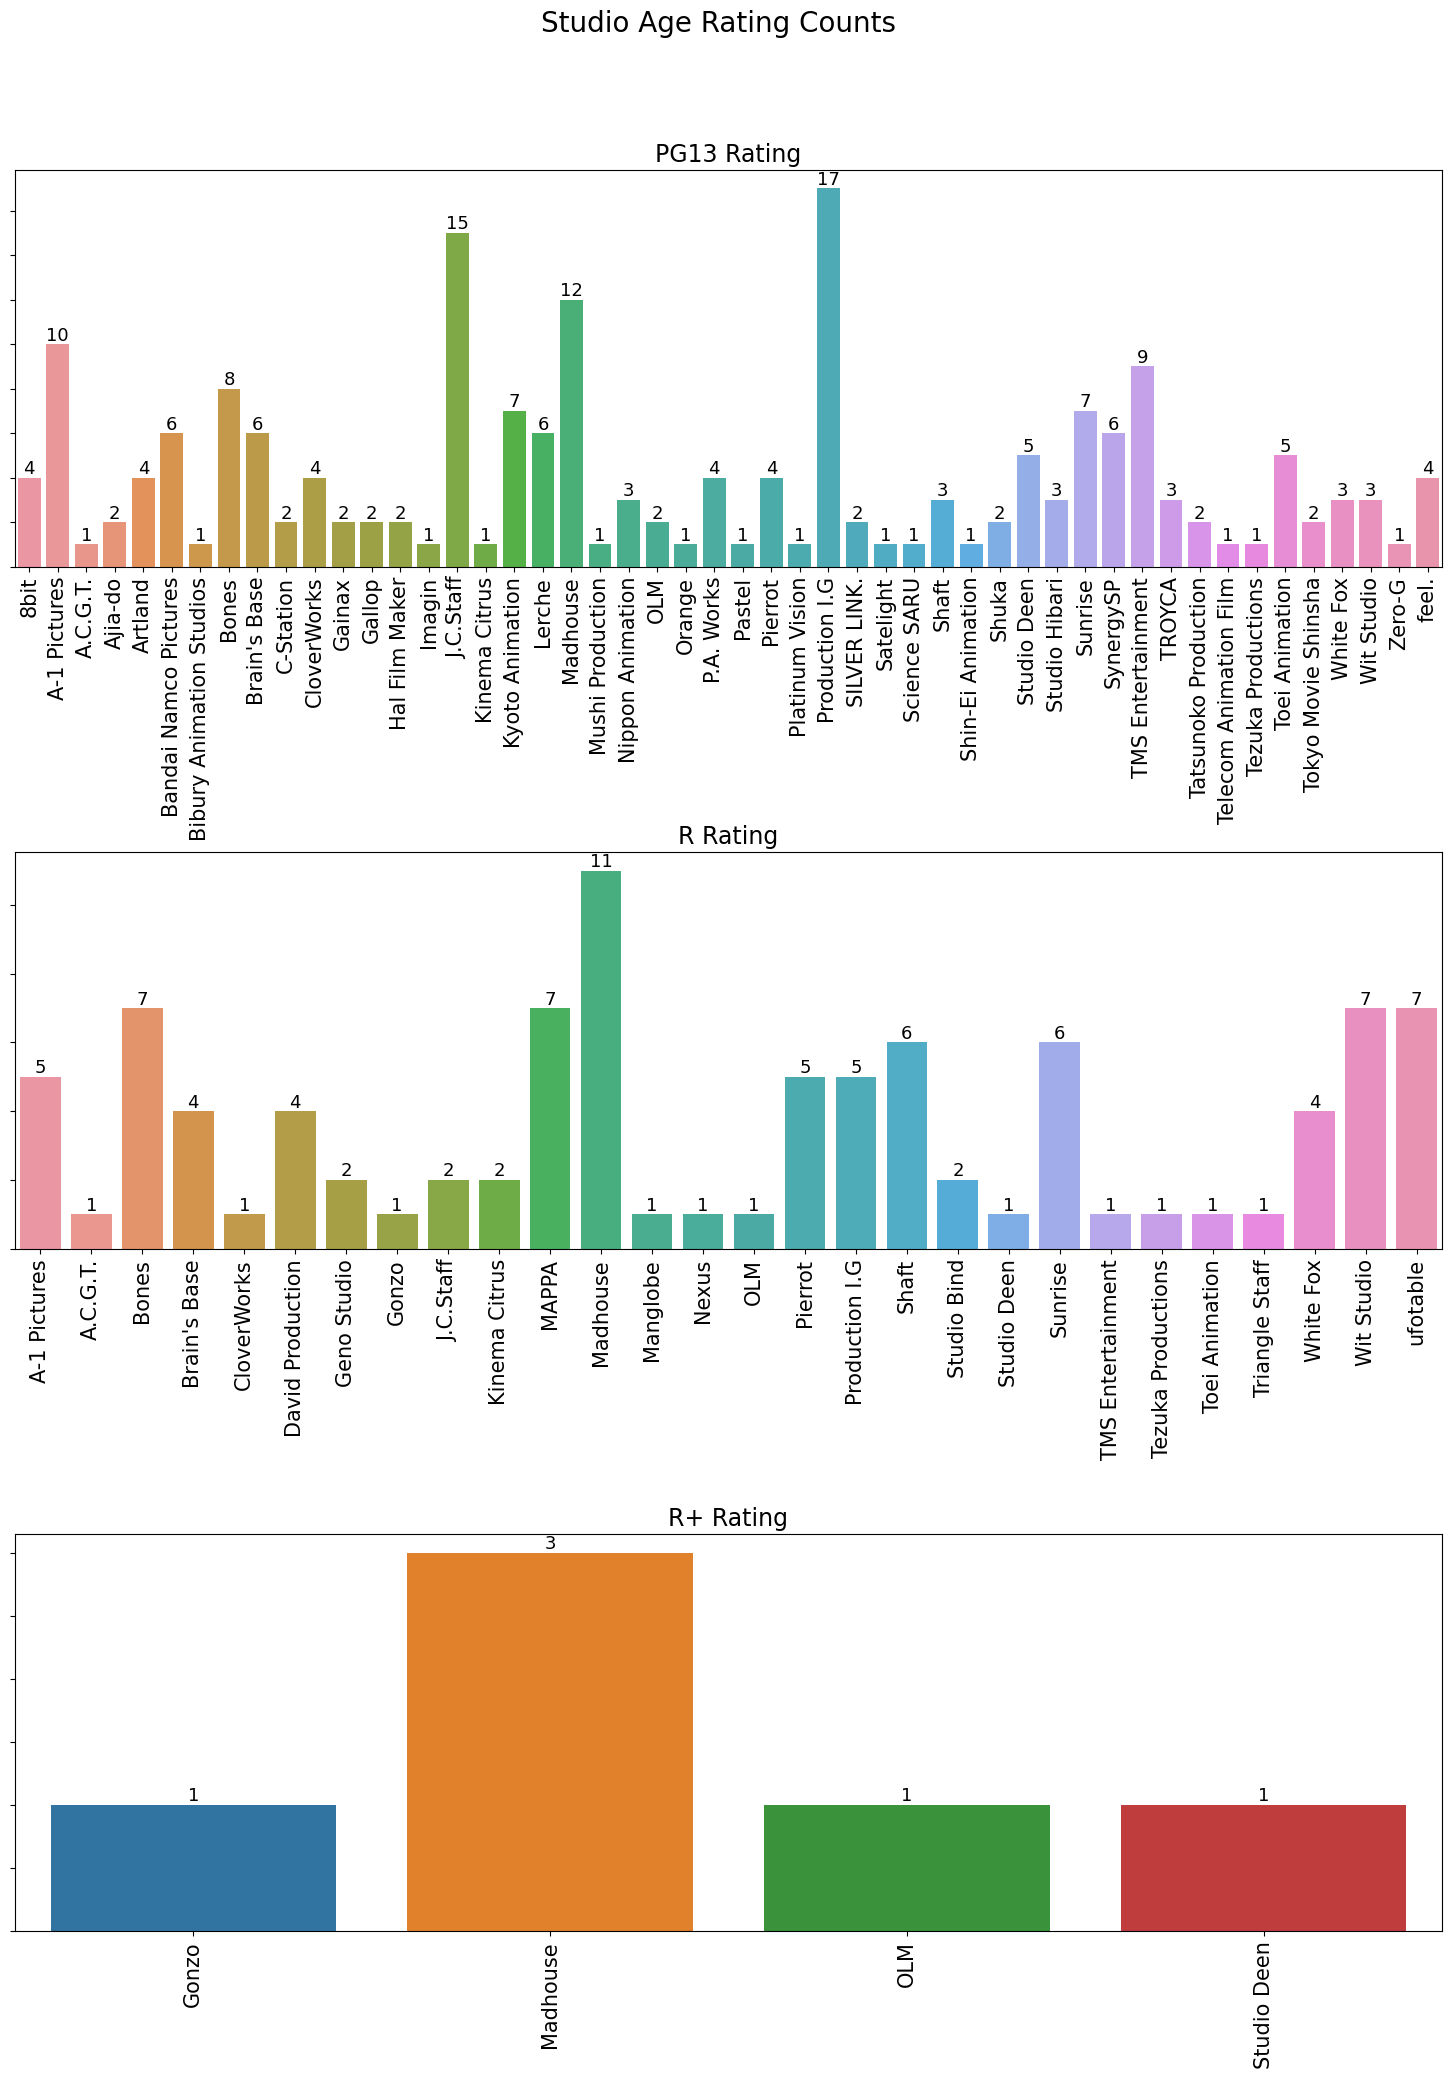

In [79]:
fig, ax = plt.subplots(3,1, figsize=(15,20))
fig.suptitle('Studio Age Rating Counts', fontsize = 20)
fig.tight_layout(h_pad=20)
fig.subplots_adjust(top = .9)


## Defining each subplot
sns.barplot(ax= ax[0], 
            x = pg13_studios.index,
            y = pg13_studios.values)

sns.barplot(ax= ax[1], 
            x = r_studios.index,
            y = r_studios.values)

sns.barplot(ax= ax[2], 
            x = rPlus_studios.index,
            y = rPlus_studios.values)

for i in ax:
    i.tick_params(labelsize = 15, rotation = 90)
    i.set_xlabel(' ')
    i.set(yticklabels =[])          # Removes ylable data

    # Puts value numbers ontop graph bars
    for container in i.containers:
        i.bar_label(container, fontsize = 13)


ax[0].set_title('PG13 Rating',  fontsize = 17)
ax[1].set_title('R Rating',     fontsize = 17)
ax[2].set_title('R+ Rating',    fontsize = 17)


# plt.show()

In [ ]:
# strudio_age


# sns.barplot(x = s_age.index,
#             y = s_age.values)

In [ ]:
# mask = (dataTV['Studio'].str.contains('Bones') & dataTV['Age Ratingn'].str.contains('PG-13'))

# dataTV[mask]

In [ ]:
# mask = (dataTV['Title'].str.contains('Boku no Hero'))
# mask = (dataTV['Title'].str.contains('Shingeki no Kyo'))
# mask = (dataTV['Title'].str.contains('Code'))

# # data[mask]

# dataTV[mask]#'Rating'].mean()

-----
----
### Generes

Fix after running other code again

In [ ]:
genreNames = ['Action', 'Adventure', 'Avant Garde', 'Award Winning','Boys Love', 'Comedy', 
              'Drama', 'Ecchi', 'Fantasy', 'Gourmet', 'Horror', 'Mystery', 'Romance',
              'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense']

In [ ]:
len(genreNames)

In [ ]:
genreList = ((dataTV.Genres).str.split("'").str[1::2])

ax = genreList.str.len().value_counts().sort_index().plot.bar(legend = False)
ax.set_title('Genre Counts')
ax.set_xlabel('Number of genres')
# ax.grid('on', axis = 'y' )
# ax.bar_label(ax.containers[1])

# ax.xl

for container in ax.containers:
    ax.bar_label(container)

In [ ]:
genList = []
for genre in genreNames:
    genreLen = (dataTV['Genres'].str.contains(genre)).sum()

    genList.append(genreLen)


    print(f'Number of items in {genre}: ', genreLen)

In [ ]:
plt.figure(figsize = (15,8))
# plt.bar(genreNames, genList)
# plt.xticks(rotation = 90)


ax = sns.barplot(x= genreNames,
                 y = genList
                 )

ax.tick_params(axis ='x', 
               rotation = 45)

ax.set_xlabel("Genres", fontsize =15)
ax.set_ylabel("Count", fontsize =15)

for container in ax.containers:
    ax.bar_label(container)

##### Delete this Draft

In [ ]:
# actionList = []
# adventureList = []
# awardWList = []
# avantGrandeList = []

# lenList = []

# # for index, value in enumerate(genreNames):
# for index, value in enumerate(genreList):
#     # print(index,str(value))

#     action_Sum      = (str(value.__contains__(genreNames[0]))).count('True')
#     adventure_Sum   = (str(value.__contains__(genreNames[1]))).count('True')
#     avantGarde_Sum  = (str(value.__contains__(genreNames[2]))).count('True')
#     awardW_Sum      = (str(value.__contains__(genreNames[3]))).count('True')



#     (actionList.append(action_Sum))
#     (adventureList.append(adventure_Sum))
#     (avantGrandeList.append(avantGarde_Sum))
#     (awardWList.append(awardW_Sum))


#     lenList.append([actionList.count, adventureList])

#     # print('test', comedySum)  


# print(genreNames[0],'\t len:',sum(actionList))
# print(genreNames[1],'\t len:',sum(adventureList))
# print(genreNames[2],'\t len:',sum(avantGrandeList))
# print(genreNames[3],'\t len:',sum(awardWList))


# print('Testing len:', (lenList[0]))

In [ ]:
testlist =[]

# genreNames = genreNames
for i in genreList:

    for j in dataTV.Genres:

        test = j.__contains__(str(i))
    
        # testlist.append(test)

        # test = (j.__contains__(i))
    
        print(test)


# print((testlist))


In [ ]:
# dataTV['Action_TF'] = str(genreList.values[2])

# dataTV.Action_TF


# dataTV.groupby(['Themes'][0])['Themes'].count()


In [ ]:
(genreList.values[2]).__contains__('Suspense')

In [ ]:
# dataTV['Genres'].str.contains('Action').sum()

genreNames

----
-----
### Producers

In [ ]:
dataTV.Producer.value_counts()[:20].plot(kind='bar', figsize=(15,5), grid=True)

-----
------
### Demograph

In [ ]:
uniqueDemo = ['Josei', 'Kids', 'Seinen', 'Shoujo', 'Shounen'] 

In [ ]:
demograph_group = dataTV.groupby(dataTV['Demograph'])

In [ ]:
demograph_count = demograph_group['Demograph'].count()

demograph_count

In [ ]:
ax = demograph_count.plot.bar()
ax.set_title('Demograph type counts')
ax.set_ylabel('Count')

----
------
### Themes

In [ ]:
uniqueThemes = ['Adult Cast', 'Anthropomorphic', 'CGDCT', 'Childcare', 'Combat Sports',    
                'Crossdressing', 'Delinquents', 'Detective', 'Educational', 'Gag Humor',     
                'Gore','Harem', 'High Stakes Game', 'Historical', 'Idols', 'Isekai', 'Iyashikei', 'Love Polygon', 'Magical Sex Shift',     
                'Mahou Shoujo' , 'Martial Arts', 'Mecha', 'Medical', 'Military',     'Music',    
                'Mythology','Organized Crime','Otaku Culture', 'Parody', 'Performing Arts',     
                'Pets', 'Psychological', 'Racing','Reincarnation', 'Reverse Harem',     
                'Romantic Subtex', 'Samurai', 'School', 'Showbiz', 'Space', 'Strategy Game', 
                'Super Power','Survival', 'Team Sports', 'Time Travel', 'Vampire',     
                'Video Game', 'Visual Arts', 'Workplace']

In [ ]:
len(uniqueThemes)

In [ ]:
themeLen = []

for themes in uniqueThemes:
    themeSum = (dataTV['Themes'].str.contains(themes)).sum()

    themeLen.append(themeSum)

    # print(f'Number of items in {themes}: ', themeSum)


In [ ]:
# themeLen

In [ ]:
plt.figure(figsize=(18,8))

ax = sns.barplot(x = uniqueThemes,
                 y = themeLen)

ax.tick_params(axis='x', 
               rotation = 90)


for container in ax.containers:
    ax.bar_label(container)

##### Meh

In [ ]:
# dataTV['themeList'] = ((dataTV.Themes).str.split("'"))

dataTV['themeList'] = ((dataTV.Themes).str.split("'").str[1::2])

# counts number of indexes
# dataTV.themeList.str.len()


# # Counts number cointaining certain number of themes
# # 121 entries have 1 themes
# # 101 enreies have 2 themes
# # 63 enreies have 3 themes
# # 16 enreies have 4 themes

((dataTV.Themes).str.split("'").str[1::2]).str.len().value_counts()


In [ ]:
# ((dataTV.Themes[8]).split("'")[1::2])

((dataTV.themeList)).sort_values()

In [ ]:
# themes_group = dataTV.groupby(dataTV['Themes'])   ## The original colom
themes_group = dataTV.groupby(dataTV['themeList'])

In [ ]:
themes_group

In [ ]:
# (dataTV.themeList)[:5].value_counts()
(dataTV.themeList).loc[:5]

In [ ]:
# Counts each adult cast occurance
dataTV.Themes.str.count('Adult Cast').sum()
dataTV.Themes.str.count('Childcare').sum()



In [ ]:
((dataTV.Themes).str.split("'").str[1::2]).str

------
------
### Source

In [ ]:
sourceDate = dataTV.Source.value_counts()

# sourceDate.index

In [ ]:
ax = sns.barplot(x = sourceDate.index,
               y = sourceDate)

ax.tick_params(axis='x', 
               rotation = 90)

for container in ax.containers:
    ax.bar_label(container)

----
-----
----
## Only Movies

In [ ]:
data.loc[data.Type == 'Movie']
